<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 1

## Desarrollo de una herramienta analítica usando solo Python

Este laboratorio busca evaluar las habilidades relacionadas con la primera parte del curso, correspondiente a las primeras tres semanas. Este enunciado estará disponible desde la semana 2 y deberá entregarse al final de la semana 4 en el enlace correspondiente. Su desarrollo corresponde al 30% de la calificación total del curso.

Esta actividad responde directamente al segundo objetivo del curso:
* Implementar una herramienta analítica que permita responder una pregunta de negocio para un problema sencillo de analítica de datos, utilizando únicamente algorítmica básica en Python.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para: 
1. Leer datos desde archivos.
2. Almacenar datos en  estructuras de Python.
3. Crear y llamar funciones correctamente.
4. Implementar condicionales diferenciando *if*, *elif* y *else*
5. Implementar ciclos diferenciando el propósito de *for* y *while*
6. Importar paquetes y utilizar sus funciones.

**NOTAS:**
- Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él desde el comienzo.


## Contexto: exploración del potencial para asignar becas Uniandes
La Universidad de los Andes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Quiero Estudiar, o Ser Pilo Paga, entre otros, han sido revolucionarios, al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades privadas más importantes del país.

Actualmente, la Universidad quiere evaluar el potencial impacto que tendrían algunos programas de *acción afirmativa* para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas. Se cuenta con información respecto a la edad, género, estado civil, estrato socio-económico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas que han respondido encuestas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar la población que sería beneficiaria de las becas. Puntualmente, se espera que, dadas unas reglas de selección (ej.: pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca información sobre la población potencialmente beneficiada, de forma que exista un sustento al momento de definir las reglas de selección.

## 1. Obtención e inspección de archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, y por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano. Cada archivo corresponde a una de las variables antes mencionadas y se puede garantizar que todos relacionan a las personas encuestadas en el mismo orden (i.e., la primera línea de todos los archivos corresponde a datos de la primera persona encuestada, la segunda línea a la segunda persona, etc.).

Los archivos con los que se cuenta son:
* *edades.txt*: un archivo ordenado con las edades de cada persona de la población encuestada 
* *género.txt*: un archivo ordenado con el género de cada persona de la población encuestada 
* *estado_civil.txt*: un archivo ordenado con el estado civil de cada persona de la población encuestada 
* *escolaridad.txt*: un archivo ordenado con el nivel de escolaridad de cada persona de la población encuestada 
* *estrato.txt*: un archivo ordenado con el estrato socio-económico de cada persona de la población encuestada
* *region.txt*: un archivo ordenado con la región de proveniencia de cada persona de la población encuestada

**Misión 1**

Poner en variables de Python la información que está en los archivos listados arriba.

* *Versión base*: escribe línea a línea el código necesario para poner en variables de Python la información de cada uno de los archivos.

* *Milla extra*: escribe una función que sea capaz de hacer lo anterior para un archivo y úsala en un ciclo para automatizar la lectura de los diferentes archivos.

In [19]:
# código

def lectura(listado):
    direccion = "./Archivos/"+listado+".txt"
    with open(direccion, mode = "r", encoding="UTF-8") as f:
        lineas = f.read().splitlines()
    return lineas

archivos = ("id","edad", "escolaridad", "estado_civil", "estrato", "genero", "promedio", "region")
listas = (list(range(1,500)),lectura("edad"),lectura("escolaridad"),lectura("estado_civil"),lectura("estrato"),lectura("genero"),lectura("promedio"),lectura("region"))

for i in archivos:
    poblacion = dict(zip(archivos,listas))

**Misión 2**

Reportar las principales características en los datos.
* *Versión base*: utilizar métricas básicas como conteos o promedios por categorías en los datos.
* *Milla extra*: utilizar visualizaciones simples como diagramas de barras, de pastel u otros.

In [20]:
# código

# importación de paquetes necesarios

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


### función que calcula la mediana de una lista de datos numéricos

numericos = ("edad", "estrato", "promedio")

def mediana(lista):
    res = [np.median(np.array([float(i) for i in poblacion.get(j)]).astype(np.float)) for j in lista]
    return res

mediana(numericos)
# [49.0, 2.0, 2.7]
# La mediana de la edad es 49 años, la mediana del estrato es 2, y la mediana del promedio es 2.7

#'''
#función que visualiza las características de una población dada
#(nota que la variable 'poblacion' es local; podemos pasar cualquier población a la función)
#'''

def desvest(lista):
    res = [np.std(np.array([float(i) for i in poblacion.get(j)]).astype(np.float)) for j in lista]
    return res

desvest(numericos)

# [18.59485133040864, 0.9762868430947945, 1.1159169144698902]
# La desviacion estandar de la edad son 19 años, estrato 1 unidad, y promedio 1 punto. 

[18.59485133040864, 0.9762868430947945, 1.1159169144698902]

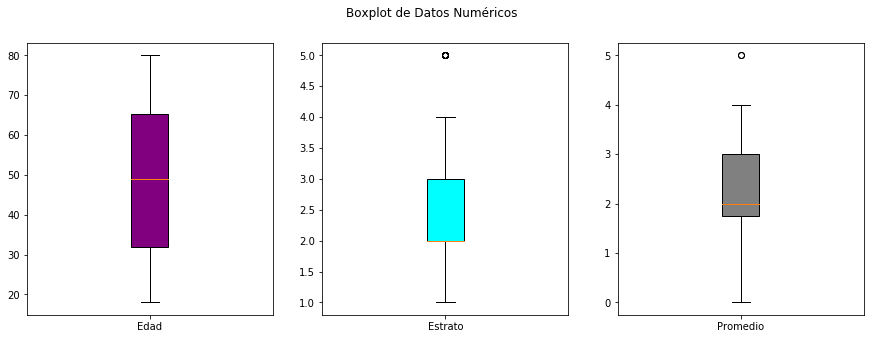

In [1386]:
# Visualizaciones datos numericos:

plt.figure(figsize=(15, 5))

plt.subplot(131)
box1 = plt.boxplot(np.array([float(i) for i in poblacion.get("edad")]).astype(np.int), patch_artist = True)
plt.setp(box1["boxes"], facecolor = "purple")
plt.xticks([1], ["Edad"])

plt.subplot(132)
box2 = plt.boxplot(np.array([float(i) for i in poblacion.get("estrato")]).astype(np.int), patch_artist = True)
plt.setp(box2["boxes"], facecolor = "cyan")
plt.xticks([1], ["Estrato"])

plt.subplot(133)
box3 = plt.boxplot(np.array([float(i) for i in poblacion.get("promedio")]).astype(np.int), patch_artist = True)
plt.setp(box3["boxes"], facecolor = "gray")
plt.xticks([1], ["Promedio"])

plt.suptitle('Boxplot de Datos Numéricos')
plt.show()

Valores: ['Amazonia' 'Andina' 'Caribe' 'Orinoquia' 'Pacifica']
Frecuencia de los valores: [ 15. 142. 193.  33. 117.]


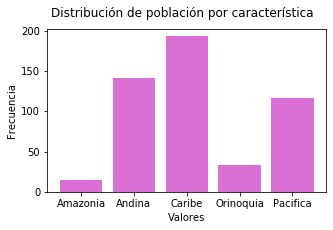

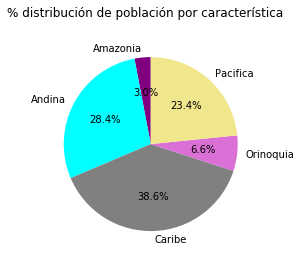

In [1613]:
# Visualización datos categóricos:

# Mayoría mujeres (50.2%), seguido de hombres (40.8%)
# Generos mayormente casados (39.8%), soltero (29.6%), divorciado (27.4%)
# Escolaridad gran mayoría secundaria (68.6%), profesional (23.4%)
# Region mayoritariamente Caribe (38.6%), Andina (28.6%), Pacifica (23.4%)

# cambiar variable de datos para ver el resto de datos categoricos
datos = poblacion.get("region")
organizados = np.sort(np.unique(datos))
frecuencia = np.zeros(len(organizados))
indice = 0 
for i in organizados:
    contador = 0
    for j in range(0,len(datos)):
        if(datos[j] == i):
            contador += 1
    frecuencia[indice] = contador
    indice += 1

print('Valores:', organizados)
print('Frecuencia de los valores:', frecuencia)

plt.figure(figsize=(5,3))
plt.xticks(np.arange(len(organizados)), organizados)
plt.suptitle('Distribución de población por característica')    
plt.xlabel("Valores",fontsize = 10) 
plt.ylabel("Frecuencia", fontsize = 10)
plt.setp(plt.bar(np.arange(len(organizados)), frecuencia), facecolor = "orchid")

colors = ["purple","cyan","gray","orchid","khaki"]
fig1, ax1 = plt.subplots(figsize=(6,4))
plt.suptitle('% distribución de población por característica')    
ax1.pie(frecuencia, labels=organizados ,autopct='%.1f%%', startangle=90, colors = colors)
plt.show()

## 2. Abordaje de la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que el criterio principal de selección debería ser respecto a lo económico y académico, sin importar otras características personales, mientras que otros piensan que considerar estas características es, de hecho, parte del espíritu del programa.

* El primer grupo sugiere que se deben tomar en orden ascendente los estratos y elegir, en cada uno de ellos, al 2% de personas con promedio académico superior en esa sub-población, hasta que se agoten las becas disponibles. En caso de quedar becas disponibles al final del proceso, se repite el mismo esquema, considerando que ya no se tienen en cuenta las personas que hayan sido elegidas en rondas anteriores.

* El segundo grupo sugiere que los recibidores de becas deben estar igualmente distribuidos entre las diferentes regiones y generos, considerando, por supuesto, que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

Dado que las diferencias entre estos grupos obedecen a su entendimiento particular del problema, el presidente del comité propone utilizar los datos disponibles de las encuestas, sugiriendo que se analice qué características tendría la población de elegidos bajo cada uno de los dos criterios expuestos.

**Misión 3**

Defina la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [1740]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

pregunta_negocio = '¿Está siendo equitativa la distribución de becas al aplicar porciones simples sobre conjuntos de información de la población, tales como estrato, región y género, para el impacto con la elegibilidad de personas con potencial y vulnerabilidad?'
pregunta_negocio

'¿Está siendo equitativa la distribución de becas al aplicar porciones simples sobre conjuntos de información de la población, tales como estrato, región y género, para el impacto con la elegibilidad de personas con potencial y vulnerabilidad?'

In [1738]:
pregunta_analytics = '¿Qué tipo de datos sobre las características de la población se deben tratar como representativos, y cuál debe ser su segmentación, para que en la asociación entre ellos, se logre un equilibrio de participación de estudiantes elegibles como becados, que garanticen principios de acción afirmativa?'
pregunta_analytics

'¿Qué tipo de datos sobre las características de la población se deben tratar como representativos, y cuál debe ser su segmentación, para que en la asociación entre ellos, se logre un equilibrio de participación de estudiantes elegibles como becados, que garanticen principios de acción afirmativa?'

**Misión 4**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *primer grupo* mencionado arriba.

In [721]:
# código

porcentaje = 0.02
becas = 10

# Para este algoritmo, se partirá de la base de tener 10 becas disponibles, que representa el 2% del total de la población

# Calculo de frecuencia de cada sub-grupo

datos = poblacion.get("estrato")
organizados = np.sort(np.unique(datos))
frecuencia = np.zeros(len(organizados))
indice = 0 
for i in organizados:
    contador = 0
    for j in range(0,len(datos)):
        if(datos[j] == i):
            contador += 1
    frecuencia[indice] = contador
    indice += 1

# Primer asignación de cada sub grupo con porcentaje, redondeado al menor:

asig1 = np.floor(np.multiply(frecuencia,porcentaje)).astype(np.int)
frec1 = np.subtract(frecuencia.astype(np.int),asig1)

# Si quedan becas disponibles, seguir asignando:
if (becas - sum(asig1)) > 0:
    asig2 = np.floor(np.multiply(frec1,porcentaje)).astype(np.int)

# Si se están asignando más becas de las que quedaron disponibles luego de la primera asignación:
if (becas - sum(asig1)) < sum(asig2):
    porcentaje2 = np.array([1,0,0,0,0])
    asig2 = np.floor(np.multiply(asig2,porcentaje2)).astype(np.int)

# Si se completa la asignación de las becas faltantes:
    if (becas - sum(asig1)) == sum(asig2):
        becas_asig = np.add(asig1,asig2)
    else:
        print("No se pueden asignar más o menos becas, la política del 2% de la población es fundamental")
estratos = np.array([1,2,3,4,5])

Valores: [1 2 3 4 5]
Frecuencia de los valores: [4 3 3 0 0]


[None, None, None, None, None]

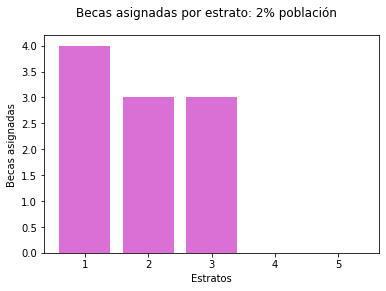

In [928]:
# Sugerencia primer grupo: 

print('Valores:', estratos)
print('Frecuencia de los valores:', becas_asig)

plt.suptitle('Becas asignadas por estrato: 2% población')
plt.xlabel("Estratos",fontsize = 10) 
plt.ylabel("Becas asignadas", fontsize = 10)
plt.setp(plt.bar(estratos, becas_asig), facecolor = "orchid")

# Se quedan los estratos 4 y 5 sin asignación, al tener menor población, el 2% no alcanza a ser representativo


In [723]:
# Las personas que se seleccionan por estrato son:

id_m1 = np.array(range(0,500))
estrato = np.array(lectura("estrato"))
promedio = np.array(lectura("promedio"))

# crear diccionarios con estratos y promedio con el index
for i in id_m1:
    estratos_m1 = dict(zip(id_m1,estrato.astype(np.int)))
    promedio_m1 = dict(zip(estratos_m1,promedio.astype(np.float)))
    
# filtro de indices del estrato 1

def becados_estrato(estr):
    estrato_1 = dict()
    for (key, value) in estratos_m1.items():
        if value == estr:
            estrato_1[key] = value
            postulados_e1 = estrato_1.keys()
            
            promedio_1 = dict()
            for (key, value) in promedio_m1.items(): 
                if key in postulados_e1:
                    promedio_1[key] = value
                    
                    sorted_e1 = dict(sorted(promedio_1.items(),key = lambda item: item[1],reverse=True))

    return print("Los encuestados elegidos para el estrato",estr," son:",list(sorted_e1.keys())[0:becas_asig[estr-1]], "con promedios: ",list(sorted_e1.values())[0:becas_asig[estr-1]])

becados_estrato(1), becados_estrato(2), becados_estrato(3), becados_estrato(4), becados_estrato(5)

# En estratos 4 y 5 también hay estudiantes con promedios de 4.8 que deberían ser considerados, 
# así como dentro de los estratos 1 al 3 hay más estudiantes con promedios de 4.8 y 4.9, que se quedan "por fuera"
# de la selección, y se privilegia sólo por el orden de aparición en el listado (no es un criterio "justo")

Los encuestados elegidos para el estrato 1  son: [376, 162, 363, 283] con promedios:  [5.0, 4.9, 4.9, 4.8]
Los encuestados elegidos para el estrato 2  son: [243, 7, 207] con promedios:  [5.0, 4.9, 4.9]
Los encuestados elegidos para el estrato 3  son: [60, 471, 109] con promedios:  [4.9, 4.9, 4.7]
Los encuestados elegidos para el estrato 4  son: [] con promedios:  []
Los encuestados elegidos para el estrato 5  son: [] con promedios:  []


(None, None, None, None, None)

**Misión 5**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *segundo grupo* mencionado arriba.

In [695]:
# código

# Al tener 5 regiones con 4 diferentes tipos de generos, se elige partir del supuesto de tener sólo 20 becas
# para los mejores promedios de estas sub-poblaciones.

becas_2 = 20

# Calculo de frecuencia de cada sub-grupo
genero = poblacion.get("genero")
region = poblacion.get("region")

dictreg = dict(zip(id_m1, region))
dictgen = dict(zip(id_m1, genero))

def crg(regi, gen):
    try:
        gen_1 = dict()
    
        for (key, value) in dictreg.items():
            if value == regi:
                gen_1[key] = value
                reg_1 = gen_1.keys()
            
                gen_2 = dict()
                for (key, value) in dictgen.items(): 
                    if key in reg_1:
                        gen_2[key] = value
                    
                        gen_region = dict()
                        for (key, value) in gen_2.items():
                            if value == gen:
                                gen_region[key] = value
                                conteogenreg = gen_region.keys()
                                freq = len(conteogenreg)
        return freq
    except:
        freq = 0
        return freq
    
    return freq

# Frecuencias para Andina - genero
subgrupos = ['AmM', 'AmF', 'AmO', 'AmNB', 'AM', 'AF', 'AO', 'ANB', 'CM', 'CF', 'CO', 'CNB', 'OM', 'OF', 'OO', 'ONB', 'PM', 'PF', 'PO', 'PNB']
subgrupos_v = [crg("Amazonia", "masculino"), crg("Amazonia", "femenino"), crg("Amazonia","otro"), crg("Amazonia","no binario"), 
              crg("Andina", "masculino"), crg("Andina", "femenino"), crg("Andina","otro"), crg("Andina","no binario"),
              crg("Caribe", "masculino"), crg("Caribe", "femenino"), crg("Caribe","otro"), crg("Caribe","no binario"),
              crg("Orinoquia", "masculino"), crg("Orinoquia", "femenino"), crg("Orinoquia","otro"), crg("Orinoquia","no binario"),
              crg("Pacifica", "masculino"), crg("Pacifica", "femenino"), crg("Pacifica","otro"), crg("Pacifica","no binario")]

Valores: ['AmM', 'AmF', 'AmO', 'AmNB', 'AM', 'AF', 'AO', 'ANB', 'CM', 'CF', 'CO', 'CNB', 'OM', 'OF', 'OO', 'ONB', 'PM', 'PF', 'PO', 'PNB']
Frecuencia de los valores: [6, 5, 2, 2, 68, 61, 1, 12, 70, 107, 2, 14, 16, 16, 1, 0, 44, 62, 0, 11]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

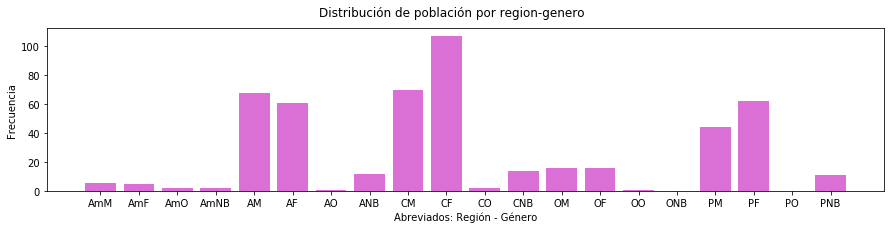

In [929]:
print('Valores:', subgrupos)
print('Frecuencia de los valores:', subgrupos_v)

plt.figure(figsize=(15,3))
plt.xticks(np.arange(len(subgrupos)), subgrupos)
plt.suptitle('Distribución de población por region-genero')    
plt.xlabel("Abreviados: Región - Género",fontsize = 10) 
plt.ylabel("Frecuencia", fontsize = 10)
plt.setp(plt.bar(np.arange(len(subgrupos)), subgrupos_v), facecolor = "orchid")

# Regiones abreviadas: Am = Amazonia, A = Andina, C = Caribe, O = Orinoquia, P = Pacifica
# Géneros abreviados: M = masculino, F = femenino, O = otro, NB = no binario

# Los subgrupos no son equilibrados, por lo que se partirá del supuesto de asignar por lo menos 1 beca por subgrupo.

In [690]:
# Las personas que se seleccionan por subgrupo son:

m5 = np.array([id_m1,lectura("region"),lectura("genero"),lectura("promedio")]).T

def becados_regxgen(reg_select,gen_select):
    
    try:
        filtro_1 = m5[(m5[:,1]==reg_select) & (m5[:,2]==gen_select)] 
        prom_1 = filtro_1[:,3] 
        prom_max = max(prom_1)
        filtro_1 = m5[(m5[:,1]==reg_select) & (m5[:,2]==gen_select)& (m5[:,3]==prom_max)] 
        return print("El encuestado elegido para la region",filtro_1[:,1],"es:", filtro_1[:,0], "con promedio: ",filtro_1[:,3])
    except:
        return print("Algún parámetro está mal escrito ó no hace parte de los listados analizados")

In [698]:
# Personas escogidas género masculino por region:
becados_regxgen("Amazonia","masculino"), becados_regxgen("Andina","masculino"), becados_regxgen("Caribe","masculino"), becados_regxgen("Orinoquia","masculino"), becados_regxgen("Pacifica","masculino")

# Regiones Amazonia y Orinoquia con umbral de promedio más bajo (política inclusión por region-género)        

El encuestado elegido para la region ['Amazonia'] es: ['49'] con promedio:  ['4.5']
El encuestado elegido para la region ['Andina'] es: ['162'] con promedio:  ['4.9']
El encuestado elegido para la region ['Caribe'] es: ['491'] con promedio:  ['4.9']
El encuestado elegido para la region ['Orinoquia'] es: ['422'] con promedio:  ['4.2']
El encuestado elegido para la region ['Pacifica'] es: ['376'] con promedio:  ['5.0']


(None, None, None, None, None)

In [692]:
# Personas escogidas género femenino por region:
becados_regxgen("Amazonia","femenino"), becados_regxgen("Andina","femenino"), becados_regxgen("Caribe","femenino"), becados_regxgen("Orinoquia","femenino"), becados_regxgen("Pacifica","femenino")

# En la región Andina hay un empate, por lo que se debería escoger con otro tipo de criterio, más allá de la secuencia de encuesta


El encuestado elegido para la region ['Amazonia'] es: ['478'] con promedio:  ['4.6']
El encuestado elegido para la region ['Andina' 'Andina'] es: ['7' '207'] con promedio:  ['4.9' '4.9']
El encuestado elegido para la region ['Caribe'] es: ['243'] con promedio:  ['5.0']
El encuestado elegido para la region ['Orinoquia'] es: ['113'] con promedio:  ['3.9']
El encuestado elegido para la region ['Pacifica'] es: ['363'] con promedio:  ['4.9']


(None, None, None, None, None)

In [693]:
# Personas escogidas género otro por region:
becados_regxgen("Amazonia","otro"), becados_regxgen("Andina","otro"), becados_regxgen("Caribe","otro"), becados_regxgen("Orinoquia","otro"), becados_regxgen("Pacifica","otro")

# En la región Pacifica no hay personas elegibles para el tipo "otro"
# Con esta característica de género, el umbral de promedio cae hasta promedios de bajo nivel por debajo de 3.6
# No debería ser considerada esta característica de la población, el umbral no es equiparable, y el rendimiento
# académico posiblemente pueda ser inferior lo que haga no sostenible la beca hasta la culminación del programa.

El encuestado elegido para la region ['Amazonia'] es: ['195'] con promedio:  ['3.1']
El encuestado elegido para la region ['Andina'] es: ['373'] con promedio:  ['2.4']
El encuestado elegido para la region ['Caribe'] es: ['136'] con promedio:  ['3.6']
El encuestado elegido para la region ['Orinoquia'] es: ['4'] con promedio:  ['2.1']
Algún parámetro está mal escrito ó no hace parte de los listados analizados


(None, None, None, None, None)

In [694]:
# Personas escogidas género otro por region:
becados_regxgen("Amazonia","no binario"), becados_regxgen("Andina","no binario"), becados_regxgen("Caribe","no binario"), becados_regxgen("Orinoquia","no binario"), becados_regxgen("Pacifica","no binario")

# En la región Orinoquia no hay personas elegibles para el tipo "no binario"
# Con esta característica de género, el umbral de promedio en Amazonia es muy inferior, puede no ser elegible.
# Hay un empate nuevamente en la región Andina, para lo que se debe incluir otra característica para definir.

El encuestado elegido para la region ['Amazonia'] es: ['375'] con promedio:  ['1.5']
El encuestado elegido para la region ['Andina' 'Andina'] es: ['259' '283'] con promedio:  ['4.8' '4.8']
El encuestado elegido para la region ['Caribe'] es: ['22'] con promedio:  ['4.3']
Algún parámetro está mal escrito ó no hace parte de los listados analizados
El encuestado elegido para la region ['Pacifica'] es: ['361'] con promedio:  ['4.0']


(None, None, None, None, None)

**Misión 6**

Desarrollar un algoritmo, a partir de lo anterior, cuyo resultado permita al comité comparar fácilmente las características de las dos poblaciones hipotéticas que recibirían becas.

*Ayuda*: considera utilizar tus implementaciones de la *Misión 2* para facilitar esta misión.

In [956]:
# código

m6 = np.array([lectura("edad"),lectura("genero"),lectura("estado_civil"),lectura("escolaridad"),lectura("estrato"),lectura("region"),lectura("promedio")]).T

# Modificar codigo anterior para que imprima una sola lista con todos los becados del criterio 1

def becados_estrato(estr):
    estrato_1 = dict()
    for (key, value) in estratos_m1.items():
        if value == estr:
            estrato_1[key] = value
            postulados_e1 = estrato_1.keys()
            
            promedio_1 = dict()
            for (key, value) in promedio_m1.items(): 
                if key in postulados_e1:
                    promedio_1[key] = value
                    
                    sorted_e1 = dict(sorted(promedio_1.items(),key = lambda item: item[1],reverse=True))

    return list(sorted_e1.keys())[0:becas_asig[estr-1]]

becados_s1 = list(becados_estrato(1))+list(becados_estrato(2))+list(becados_estrato(3))

In [957]:
# Modificar codigo anterior para que imprima una sola lista con todos los becados del criterio 2

def becados_regxgen(reg_select,gen_select):
    filtro_1 = m5[(m5[:,1]==reg_select) & (m5[:,2]==gen_select)] 
    prom_1 = filtro_1[:,3] 
    prom_max = max(prom_1)
    filtro_1 = m5[(m5[:,1]==reg_select) & (m5[:,2]==gen_select)& (m5[:,3]==prom_max)] 
    return list(filtro_1.T[0].astype(int))

becados_s2 = becados_regxgen("Amazonia","masculino") + becados_regxgen("Andina","masculino") + becados_regxgen("Caribe","masculino") + becados_regxgen("Orinoquia","masculino") + becados_regxgen("Pacifica","masculino") + becados_regxgen("Amazonia","femenino") + becados_regxgen("Andina","femenino") + becados_regxgen("Caribe","femenino") + becados_regxgen("Orinoquia","femenino") + becados_regxgen("Pacifica","femenino") + becados_regxgen("Amazonia","otro") + becados_regxgen("Andina","otro") + becados_regxgen("Caribe","otro") + becados_regxgen("Orinoquia","otro") + becados_regxgen("Amazonia","no binario") + becados_regxgen("Andina","no binario") + becados_regxgen("Caribe","no binario")+ becados_regxgen("Pacifica","no binario")

In [958]:
# Orden: Edad,genero, estado civil, escolaridad, estrato, region

def filtro_base(cual):
    for i in id_m1:
        total_datos = dict(zip(id_m1,m6))
        tot_s1 = dict()
        for (key, value) in total_datos.items():
                if key in cual:
                    tot_s1[key] = value
    return tot_s1
# filtro de un diccionario solo con los datos de los becados_s1
tot_s1 = filtro_base(becados_s1)
# filtro de un diccionario solo con los datos de los becados_s2
tot_s2 = filtro_base(becados_s2)              

In [1004]:
# Solo extraer género, región y promedio para comparar por frecuencias:

subconj_s1 = np.array(list(tot_s1.values())).T
subconj_s2 = np.array(list(tot_s2.values())).T

gen_s1 = list(subconj_s1[1])
reg_s1 = list(subconj_s1[5])
prom_s1 = list(subconj_s1[6])
prom_s1 = [float(i) for i in prom_s1]
estr_s1 = list(subconj_s1[4])
estr_s1 = [int(i) for i in estr_s1]

gen_s2 = list(subconj_s2[1])
reg_s2 = list(subconj_s2[5])
prom_s2 = list(subconj_s2[6])
prom_s2 = [float(i) for i in prom_s2]
estr_s2 = list(subconj_s2[4])
estr_s2 = [int(i) for i in estr_s2]

def conteofr_s(listado):
    organizados = np.sort(np.unique(listado))
    frecuencia = np.zeros(len(organizados))
    indice = 0 

    for i in organizados:
        contador = 0
        for j in range(0,len(listado)):
            if(listado[j] == i):
                contador += 1
        frecuencia[indice] = contador
        indice += 1
    return frecuencia.astype(int)

generos_s1 = conteofr_s(gen_s1)
regiones_s1 = conteofr_s(reg_s1)

generos_s2 = conteofr_s(gen_s2)
regiones_s2 = conteofr_s(reg_s2)


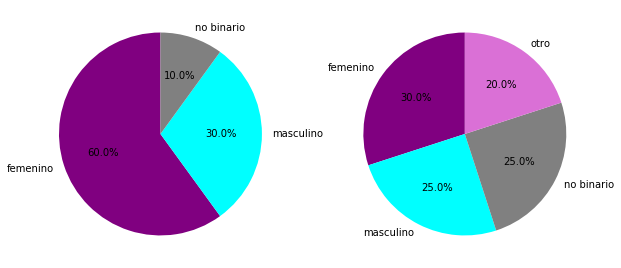

In [954]:
# Comparativo becas asignadas por genero:

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(generos_s1, labels=np.sort(np.unique(gen_s1)) ,autopct='%.1f%%', startangle=90, colors = colors)
ax2.pie(generos_s2, labels=np.sort(np.unique(gen_s2)) ,autopct='%.1f%%', startangle=90, colors = colors)
plt.show()

# Izq : criterio 1, Der: criterio 2

# Bajo el criterio 2, es posible lograr igualdad de participación de géneros, sin embargo, hay unos de ellos
# que por region no hacen parte de la población, por lo que para equiparar estos 2 faltantes, se compensó con
# los mejores promedios de cada sub conjunto, en donde hubiese un empate, completando las becas a asignar.

# Si sólo se mira desde esta característica, elegir por genero y region tiene un comportamiento de aparente "equidad"

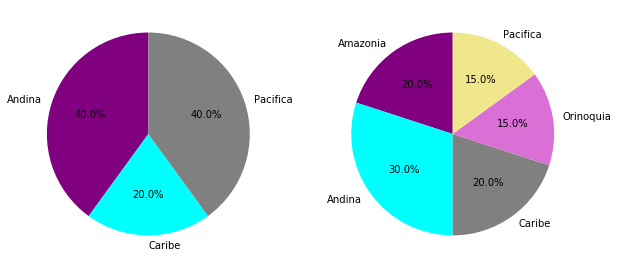

In [990]:
# Comparativo becas asignadas por región

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(regiones_s1, labels=np.sort(np.unique(reg_s1)) ,autopct='%.1f%%', startangle=90, colors = colors)
ax2.pie(regiones_s2, labels=np.sort(np.unique(reg_s2)) ,autopct='%.1f%%', startangle=90, colors = colors)
plt.show()


# Izq : criterio 1, Der: criterio 2

# Bajo el criterio 2, es posible lograr igualdad de participación de regiones, donde por la falta de géneros en
# 2 regiones (orinoquia,pacifica), la cuota se completa con la region andina, siendo una de las regiones con mayor
# población a analizar.
# Bajo el criterio 1, la elegibilidad por promedio descarta a regiones vulnerables en donde los promedios son bajos,
# incluso por debajo del umbral de calificación de aprobación del grueso de las universidades (3.0-3.5)


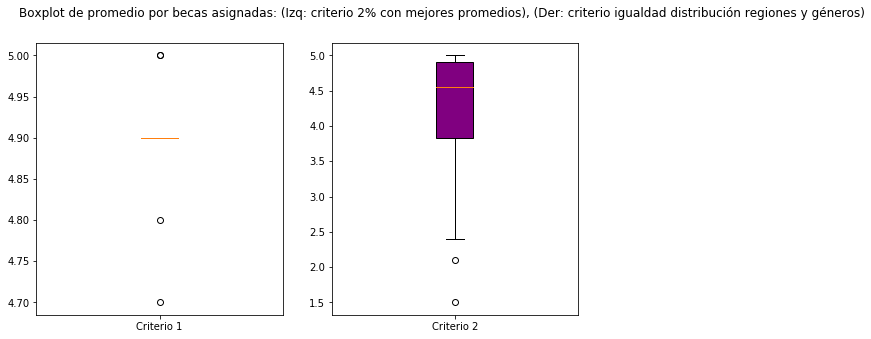

In [1387]:
# Comparativo por promedio

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.suptitle('Boxplot de promedio por becas asignadas')
box1 = plt.boxplot(prom_s1, patch_artist = True)
plt.setp(box1["boxes"], facecolor = "cyan")
plt.xticks([1], ["Criterio 1"])

plt.subplot(132)
plt.suptitle('Boxplot de promedio por becas asignadas: (Izq: criterio 2% con mejores promedios), (Der: criterio igualdad distribución regiones y géneros)')
box2 = plt.boxplot(prom_s2, patch_artist = True)
plt.setp(box2["boxes"], facecolor = "purple")
plt.xticks([1], ["Criterio 2"])

plt.show()

# En el criterio 1, se están eligiendo a los encuestados con mayores promedios registrados, siendo la distribución
# desde 4.7 a 5.0, y con una mediana en 4.9

# Cuando se toma en cuenta el criterio 2, ha pesar de haber mejor distribución por región y género, el rango de 
# promedios se extiende a recibir personas con promedios muy bajos (outliers)

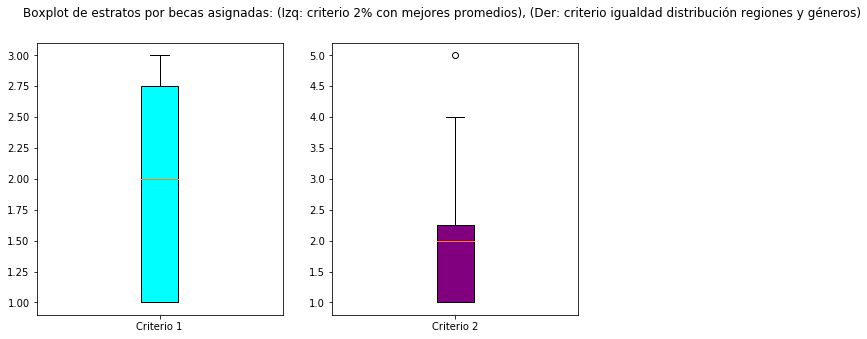

In [1388]:
# Comparativo por promedio

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.suptitle('Boxplot de promedio por becas asignadas')
box1 = plt.boxplot(estr_s1, patch_artist = True)
plt.setp(box1["boxes"], facecolor = "cyan")
plt.xticks([1], ["Criterio 1"])

plt.subplot(132)
plt.suptitle('Boxplot de estratos por becas asignadas: (Izq: criterio 2% con mejores promedios), (Der: criterio igualdad distribución regiones y géneros)')
box2 = plt.boxplot(estr_s2, patch_artist = True)
plt.setp(box2["boxes"], facecolor = "purple")
plt.xticks([1], ["Criterio 2"])

plt.show()

# A nivel de estratos, según el criterio 1, no se tienen en cuenta el 4 y 5 por su baja cantidad de participación
# dentro de la población, mientras que en el segundo criterio, si bien se concentra en la población vulnerable de
# estrato 1 y 2, hay apertura a estratos 4 y 5

## 3. Desarrollo de una solución analítica

Reconociendo la complejidad de este problema (que no permite reducirlo a una dicotomía) y viendo el potencial del análisis de datos para enriquecer la discusión y los insumos para tomar decisiones, el comité ha solicitado una herramienta analítica que les permita . Sus requerimientos son:

* La herramienta debe permitir ingresar una política de selección de becados.
    * Se debe poder elegir el rango de edad de los aspirantes.
    * Se debe poder elegir qué proporción de las becas se asigna a cada género, a cada estrato, o a cada región (pero sólo debe elegirse uno de estos criterios).
* La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente elegida si se usara la política ingresada.

**Misión 7**

Desarrollar, a partir de lo construido hasta el momento, un algoritmo que permita cumplir con los requerimientos del comité.

In [1664]:
# código

# Total becas a asignar por filtro de edad y genero:
m7 = np.array([id_m1,lectura("edad"),lectura("genero"),lectura("estrato"),lectura("region"),lectura("promedio")]).T

def becados_m7(min_edad,max_edad,caracteristica, vector_genero):
    
    if min_edad < 18 or max_edad > 80:
        a = print("Las edades elegidas no se pueden utilizar, mínima 18, máxima 80")
    else:
        filtro_edad = m7[(m7[:,1].astype(int) >= min_edad) & (m7[:,1].astype(int) <= max_edad)]
    
    # si se elige la característica género:
        if caracteristica == "genero":
            filtro_genero = list(filtro_edad[:,2])
            organizados = np.sort(np.unique(filtro_genero))
            freq_genero = conteofr_s(filtro_genero) # función de misiones anteriores
            vector_p = vector_genero[:-1] # le quito el último para dejar el vector de 4 (otras caract. con 5)
            if sum(vector_p) < 1 or sum(vector_p) > 1:
                a = print("Los porcentajes no están distribuidos correctamente, no suman 100%")
                
            else:
                tot_becas_caracteristica = np.floor(np.multiply(freq_genero,vector_p)).astype(int)
                tot_becas_caracteristica = dict(zip(organizados,tot_becas_caracteristica))
                
    # Selección del listado que cumple con las caracteristicas:
                def takelast(elem):
                    return elem[5]

                filtro_gen1 = list(filtro_edad[filtro_edad[:,2] == "femenino"])
                filtro_gen1.sort(key=takelast, reverse = True)
                filtro_gen2 = list(filtro_edad[filtro_edad[:,2] == "masculino"])
                filtro_gen2.sort(key=takelast, reverse = True)
                filtro_gen3 = list(filtro_edad[filtro_edad[:,2] == "no binario"])
                filtro_gen3.sort(key=takelast, reverse = True)
                filtro_gen4 = list(filtro_edad[filtro_edad[:,2] == "otro"])
                filtro_gen4.sort(key=takelast, reverse = True)

                a = filtro_gen1[0:tot_becas_caracteristica["femenino"]]
                b = filtro_gen2[0:tot_becas_caracteristica["masculino"]]
                c = filtro_gen3[0:tot_becas_caracteristica["no binario"]]
                d = filtro_gen4[0:tot_becas_caracteristica["otro"]]
                a += b+c+d

    # si se elige la característica estrato:
        elif caracteristica == "estrato":
            filtro_estrato = list(filtro_edad[:,3])
            organizados = np.sort(np.unique(filtro_estrato))
            freq_estrato = conteofr_s(filtro_estrato) # función de misiones anteriores
            vector_p = vector_genero
            if sum(vector_p) < 1 or sum(vector_p) > 1:
                a = print("Los porcentajes no están distribuidos correctamente, no suman 100%")
                
            else:
                tot_becas_caracteristica = np.floor(np.multiply(freq_estrato,vector_p)).astype(int)
                tot_becas_caracteristica = dict(zip(organizados,tot_becas_caracteristica))
                
    # Selección del listado que cumple con las caracterísricas:
    
                def takelast(elem):
                    return elem[5]

                filtro_estr1 = list(filtro_edad[filtro_edad[:,3] == "1"])
                filtro_estr1.sort(key=takelast, reverse = True)
                filtro_estr2 = list(filtro_edad[filtro_edad[:,3] == "2"])
                filtro_estr2.sort(key=takelast, reverse = True)
                filtro_estr3 = list(filtro_edad[filtro_edad[:,3] == "3"])
                filtro_estr3.sort(key=takelast, reverse = True)
                filtro_estr4 = list(filtro_edad[filtro_edad[:,3] == "4"])
                filtro_estr4.sort(key=takelast, reverse = True)
                filtro_estr5 = list(filtro_edad[filtro_edad[:,3] == "5"])
                filtro_estr5.sort(key=takelast, reverse = True)

                a = filtro_estr1[0:tot_becas_caracteristica["1"]]
                b = filtro_estr2[0:tot_becas_caracteristica["2"]]
                c = filtro_estr3[0:tot_becas_caracteristica["3"]]
                d = filtro_estr4[0:tot_becas_caracteristica["4"]]
                e = filtro_estr4[0:tot_becas_caracteristica["5"]]

                a += b+c+d+e
            
    # si se elige la característica region:
        elif caracteristica == "region":
            filtro_region = list(filtro_edad[:,4])
            organizados = np.sort(np.unique(filtro_region))
            freq_region = conteofr_s(filtro_region) # función de misiones anteriores
            vector_p = vector_genero
            if sum(vector_p) < 1 or sum(vector_p) > 1:
                a = print("Los porcentajes no están distribuidos correctamente, no suman 100%")
                
            else:
                tot_becas_caracteristica = np.floor(np.multiply(freq_region,vector_p)).astype(int)
                tot_becas_caracteristica = dict(zip(organizados,tot_becas_caracteristica))
                
    # Selección del listado que cumple con las características:
    
                def takelast(elem):
                    return elem[5]

                filtro_reg1 = list(filtro_edad[filtro_edad[:,4] == "Amazonia"])
                filtro_reg1.sort(key=takelast, reverse = True)
                filtro_reg2 = list(filtro_edad[filtro_edad[:,4] == "Andina"])
                filtro_reg2.sort(key=takelast, reverse = True)
                filtro_reg3 = list(filtro_edad[filtro_edad[:,4] == "Caribe"])
                filtro_reg3.sort(key=takelast, reverse = True)
                filtro_reg4 = list(filtro_edad[filtro_edad[:,4] == "Orinoquia"])
                filtro_reg4.sort(key=takelast, reverse = True)
                filtro_reg5 = list(filtro_edad[filtro_edad[:,4] == "Pacifica"])
                filtro_reg5.sort(key=takelast, reverse = True)

                a = filtro_reg1[0:tot_becas_caracteristica["Amazonia"]]
                b = filtro_reg2[0:tot_becas_caracteristica["Andina"]]
                c = filtro_reg3[0:tot_becas_caracteristica["Caribe"]]
                d = filtro_reg4[0:tot_becas_caracteristica["Orinoquia"]]
                e = filtro_reg4[0:tot_becas_caracteristica["Pacifica"]]

                a += b+c+d+e
                
        else:
            a = print("Se está eligiendo una característica que se sale de este modelo ó está mal escrita")
            
    return a

# Ingresar datos: min_edad (int) ,max_edad (int) ,caracteristica(str), vect_porcentajes (list)
Datos_considerados = becados_m7(20,30,"estrato", [0.20, 0.45, 0.15, 0.20, 0.0])

print("Para los parámetros seleccionados, el total de becas a entregar es :", len(Datos_considerados))

Para los parámetros seleccionados, el total de becas a entregar es : 26


In [1665]:
edad_m7 = list((np.array(Datos_considerados)).T[1])
edad_m7 = [int(x) for x in edad_m7]
genero_m7 = list(np.array(Datos_considerados).T[2])
estrato_m7 = list(np.array(Datos_considerados).T[3])
estrato_m7 = [int(x) for x in estrato_m7]
region_m7 = list(np.array(Datos_considerados).T[4])
promedio_m7 = list(np.array(Datos_considerados).T[5])
promedio_m7 = [float(x) for x in promedio_m7]

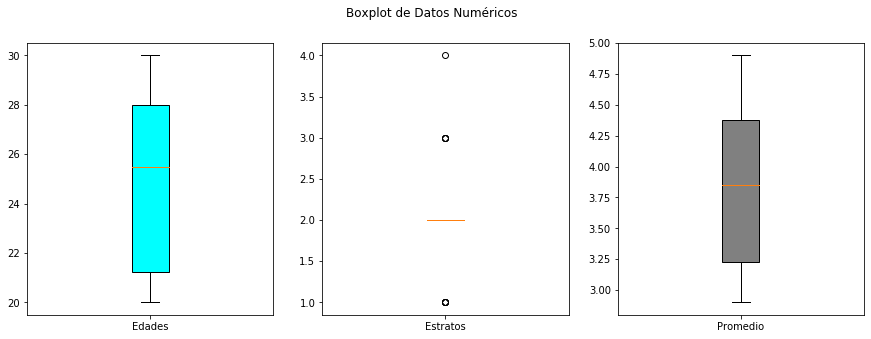

In [1666]:
# Descripción de la población: datos numéricos

plt.figure(figsize=(15, 5))

plt.subplot(131)
box1 = plt.boxplot(edad_m7, patch_artist = True)
plt.setp(box1["boxes"], facecolor = "cyan")
plt.xticks([1], ["Edades"])

plt.subplot(132)
box2 = plt.boxplot(estrato_m7, patch_artist = True)
plt.setp(box2["boxes"], facecolor = "purple")
plt.xticks([1], ["Estratos"])

plt.subplot(133)
box3 = plt.boxplot(promedio_m7, patch_artist = True)
plt.setp(box3["boxes"], facecolor = "gray")
plt.xticks([1], ["Promedio"])

plt.suptitle('Boxplot de Datos Numéricos')
plt.show()

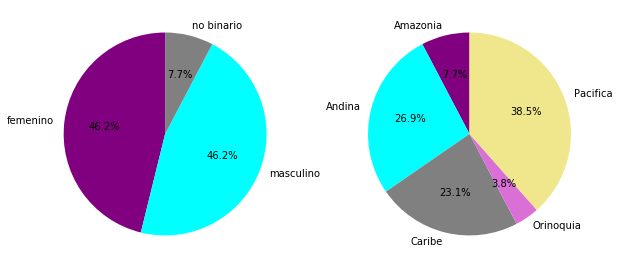

In [1667]:
# Descripción de la población: datos categóricos

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(conteofr_s(genero_m7), labels=np.sort(np.unique(genero_m7)) ,autopct='%.1f%%', startangle=90, colors = colors)
ax2.pie(conteofr_s(region_m7), labels=np.sort(np.unique(region_m7)) ,autopct='%.1f%%', startangle=90, colors = colors)

plt.show()


**Misión 8**

Proponer, con base en tu propio uso de la herramienta, una política de ingreso que consideres apropiada dado el contexto proporcionado. Si lo crees adecuado, explica, máximo 500 caracteres, las virtudes de tu propuesta (esto puede estar soportado en los datos, o no).

In [1710]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

respuesta = 'Luego de múltiples iteraciones, se sugiere entregar 26 becas (5% población), cumpliendo lo siguiente: objetivo de edades entre 20-30 años (subconjunto con los mejores promedios (min:2.9, máx:4.9, mediana:3.8); con una población donde mayoritariamente es estrato 2, objetivo estratos 1:20%,2:45%,3:15%,4:20%,5:0%. Lo anterior conlleva a una equidad entre hombres-mujeres, cuya diferencia poblacional era de 9.4 p.p., así como todas las regiones quedan representadas, destacando "Pacifica" con mayoría.'
respuesta

'Luego de múltiples iteraciones, se sugiere entregar 26 becas (5% población), cumpliendo lo siguiente: objetivo de edades entre 20-30 años (subconjunto con los mejores promedios (min:2.9, máx:4.9, mediana:3.8); con una población donde mayoritariamente es estrato 2, objetivo estratos 1:20%,2:45%,3:15%,4:20%,5:0%. Lo anterior conlleva a una equidad entre hombres-mujeres, cuya diferencia poblacional era de 9.4 p.p., así como todas las regiones quedan representadas, destacando "Pacifica" con mayoría.'

**Misión 9**

Ejecutar el algoritmo desarrollado en la *Misión 7* sobre la política que sugieres proponer al comité. Explicar claramente tus conlusiones con el soporte de los resultados de la herramienta.

In [1723]:
# código

conclusion = 'Durante el ejercicio con múltiples iteraciones, se abordó inicialmente desde la edad, donde al aumentar el rango no sólo aumentaban las becas a asignar, sino disminuía el promedio mínimo, incluso por debajo de 2, por lo que considerando una sostenibilidad en el periodo académico y posiblemente la disminución de la deserción, se seleccionó el rango de edades que mejores estadísticas de promedio tuvieran; ahora bien, al evaluar características, se observó que asignar porcentajes por género para buscar la equidad, dejaba por fuera la participación de regiones vulnerables como Orinoquía, cuya población representaba sólo el 6.6%, y para ser representativa, tenían que asignarse hasta 73 becas para participar a lo sumo en un 3%, es decir, al rededor de 2 becas, participación que se alcanzó con 1 beca en 26 del modelo propuesto, con 64% menos becas asignadas; continuando con las regiones, aún asignando un 100% a la región "Pacifica", y con amplios rangos de edades hasta 50 años, al estar la gran mayoría de los datos fuera de los límites elegidos, y con el incremento de participación de las otras regiones en estos rangos de edades, no se podía llegar a la cuota, por lo que se prescindió de esta característica. Y por último, al poder seleccionar la participación de los estratos, habiendo identificado que el estrato 2 era la mediana y habia una fuerte participación de estratos 1 y 2, se asignaron porcentajes favoreciendo el 2, pero también incluyendo al 4 que en otros momentos quedaba aislado, entendiendo que en este estrato había oportunidad por los promedios. En suma, llegar a representar las regiones vulnerables, requiere una fuerte asociación del estrato, y bajar el umbral de los promedios, ya que ha pesar de haber escogido a los mejores, se marca la tendencia por región de Andina y Caribe al tener los mejores promedios, y Amazonía junto con Orinoquia con los promedios más bajos, lo cual repercutió en su participación por region, proponiendo entonces desde la Universidad (más allá de los resultados de este modelo), considerar un plan estratégico de educación de nivelación de estas poblaciones, para fortalecer su elegibilidad, así como ir más allá del valor numérico del promedio, entrando a una evaluación de competencias, para compensar los sesgos que esto supone.'
conclusion

'Durante el ejercicio con múltiples iteraciones, se abordó inicialmente desde la edad, donde al aumentar el rango no sólo aumentaban las becas a asignar, sino disminuía el promedio mínimo, incluso por debajo de 2, por lo que considerando una sostenibilidad en el periodo académico y posiblemente la disminución de la deserción, se seleccionó el rango de edades que mejores estadísticas de promedio tuvieran; ahora bien, al evaluar características, se observó que asignar porcentajes por género para buscar la equidad, dejaba por fuera la participación de regiones vulnerables como Orinoquía, cuya población representaba sólo el 6.6%, y para ser representativa, tenían que asignarse hasta 73 becas para participar a lo sumo en un 3%, es decir, al rededor de 2 becas, participación que se alcanzó con 1 beca en 26 del modelo propuesto, con 64% menos becas asignadas; continuando con las regiones, aún asignando un 100% a la región "Pacifica", y con amplios rangos de edades hasta 50 años, al estar la g

## Referencias
* Discriminación Positiva<br> 
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

Camilo Gómez - 11/06/21<br>
*Revisado*: 25/08/21